<a href="https://colab.research.google.com/github/MohamedFarhun/IntelOneAPICodeMaven_Safe-Secure/blob/main/Consumer_Sentiment_Analysis_Safe%26Secure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IntelOneAPI Code Maven**

**Problem 1:- Predicting Consumer Sentiment**

**Introduction:**- Many use pricey GPUs to shorten training and inference times for machine learning on industrial datasets that are getting bigger and bigger. Our project's demonstration will demonstrate how you may speed up your machine learning workflow utilising Intel's optimised libraries, which are both affordable and streamlined.

**IntelOneAPI toolkits:-** This reference notebook will show you how to use multiple accelerated Python libraries included in the Intel® AI Analytics Toolkit to improve your ML workflow's training cycles, prediction throughput, and accuracy (AI Kit). The principal libraries we'll use in this notebook are:

1.Intel® Distribution of Modin*

2.Intel® Extension for Scikit-learn*

3.Intel® Daal4py

4.XGBoost Optimized for Intel® Architecture

5.Intel® Extension for Pytorch

6.Intel®Optimization for Tensorflow


**About the project:-**My code predicts the sentiments underlying tweets received in real time using tweepy and categorise them as positive, negative, or neutral, this script first performs EDA before preprocessing numerous datasets to train a bidirectional LSTM model.

**Packages:-**I have installed the required packages for building the predictive model which enables efficient training and inference on various hardware platforms.Installing the tweepy library is necessary in order to retrieve tweets from Twitter. This package will be used to gather tweets from which our model will provide predictions.

In [1]:
!pip install scikit-learn-intelex
!pip install tweepy
!pip install modin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 53.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.0 MB/s eta 0:00:00


**Hardware Requirements:-** I have used 5th generation of Intel(R) Xeon(R) Core(TM) i5-10210U CPU @ 1.60GHz 2.11 GHz

In [2]:
!lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           79
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:                        0
CPU MHz:                         2200.212
BogoMIPS:                        4400.42
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        55 MiB
NUMA node0 CPU(s):               0,1
Vulnerability 

**The Intel® Distribution of Modin:-**It is used to process and study the data first. With support for datasets from 1 MB to 1 TB+, the Intel® Distribution of Modin is a distributed DataFrame library created to expand your pandas process naturally with the size of your dataset. One core is used at a time with pandas. Modin's Dask* engine, on the other hand, utilises every available core, enabling you to work with very big datasets at significantly faster rates. Use the following code to use Modin with the Dask engine:

In [3]:
import modin.pandas as pd
from modin.config import Engine
Engine.put("dask") 

In [4]:
import os
import daal4py as d4p
from xgboost import XGBClassifier
import time
import warnings
import pandas
import numpy as np
import seaborn as sns

**Exploratory Data analysis**:-Cleaning and preparing the dataset

In [ ]:
df1 = pd.read_csv('Twitter_Data.csv')
df1.head()

In [6]:
df2 = pd.read_csv('apple-twitter-sentiment-texts.csv')
df2 = df2.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df2['category'] = df2['category'].map({-1: -1.0, 0: 0.0, 1:1.0})
df2.head()

,clean_text,category
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1.0
1,What Happened To Apple Inc? http://t.co/FJEX...,0.0
2,Thank u @apple I can now compile all of the pi...,1.0
3,The oddly uplifting story of the Apple co-foun...,0.0
4,@apple can i exchange my iphone for a differen...,0.0


In [7]:
df3 = pd.read_csv('finalSentimentdata2.csv')
df3 = df3.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df3['category'] = df3['category'].map({'sad': -1.0, 'anger': -1.0, 'fear': -1.0, 'joy':1.0})
df3 = df3.drop(['Unnamed: 0'], axis=1)
df3.head()

,category,clean_text
0,-1.0,agree the poor in india are treated badly thei...
1,1.0,if only i could have spent the with this cutie...
2,1.0,will nature conservation remain a priority in ...
3,-1.0,coronavirus disappearing in italy show this to...
4,-1.0,uk records lowest daily virus death toll since...


In [8]:
df4 = pd.read_csv('Tweets.csv')
df4 = df4.rename(columns={'text': 'clean_text', 'airline_sentiment':'category'})
df4['category'] = df4['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive':1.0})
df4 = df4[['category','clean_text']]
df4.head()

,category,clean_text
0,0.0,@VirginAmerica What @dhepburn said.
1,1.0,@VirginAmerica plus you've added commercials t...
2,0.0,@VirginAmerica I didn't today... Must mean I n...
3,-1.0,@VirginAmerica it's really aggressive to blast...
4,-1.0,@VirginAmerica and it's a really big bad thing...


In [9]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [10]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [11]:
df.dropna(axis=0, inplace=True)

In [12]:
df.shape

(182329, 2)

In [13]:
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
pd.options.plotting.backend = "plotly"

In [15]:
df.groupby('category').count().plot(kind='bar')

In [16]:
tweet_len = pd.Series([len(tweet.split()) for tweet in df['clean_text']])
tweet_len.plot(kind='box')

/usr/local/lib/python3.10/dist-packages/modin/pandas/series.py:122: UserWarning:

Distributing <class 'list'> object. This may take some time.



Text(0.5, 0.98, 'Distribution of text length for positive sentiment tweets.')

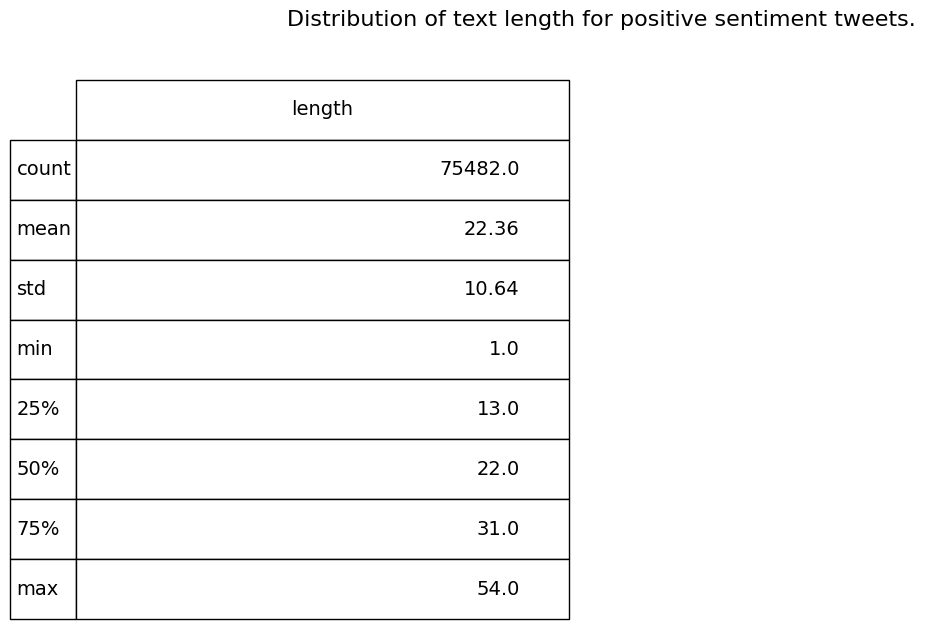

In [17]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
describe = df.length[df.category=='Positive'].describe().to_frame().round(2)
ax1= fig.add_subplot(121)
ax1.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax1.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)


Text(0.5, 0.98, 'Distribution of text length for Negative sentiment tweets.')

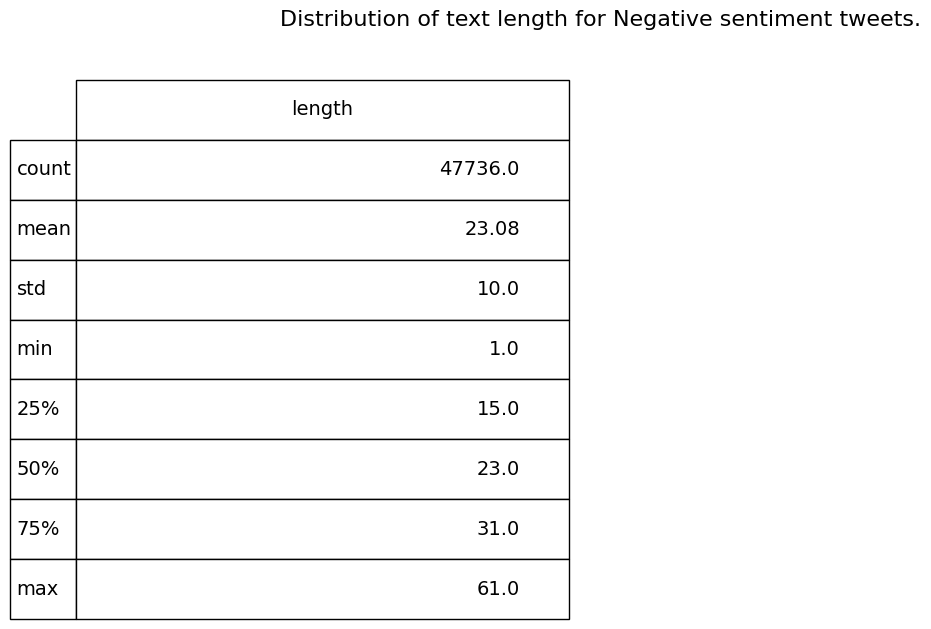

In [18]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
describe = df.length[df.category=='Negative'].describe().to_frame().round(2)
ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

In [19]:
df.drop(['length'], axis=1, inplace=True)
df.head

<bound method BasePandasDataset.head of                                                clean_text  category
0       when modi promised “minimum government maximum...  Negative
1       talk all the nonsense and continue all the dra...   Neutral
2       what did just say vote for modi  welcome bjp t...  Positive
3       asking his supporters prefix chowkidar their n...  Positive
4       answer who among these the most powerful world...  Positive
...                                                   ...       ...
182335  @AmericanAir thank you we got on a different f...  Positive
182336  @AmericanAir leaving over 20 minutes Late Flig...  Negative
182337  @AmericanAir Please bring American Airlines to...   Neutral
182338  @AmericanAir you have my money, you change my ...  Negative
182339  @AmericanAir we have 8 ppl so we need 2 know h...   Neutral

[182329 rows x 2 columns]>

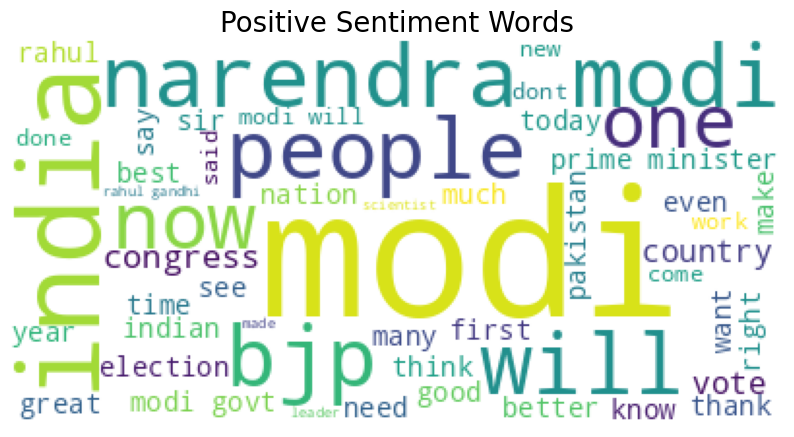

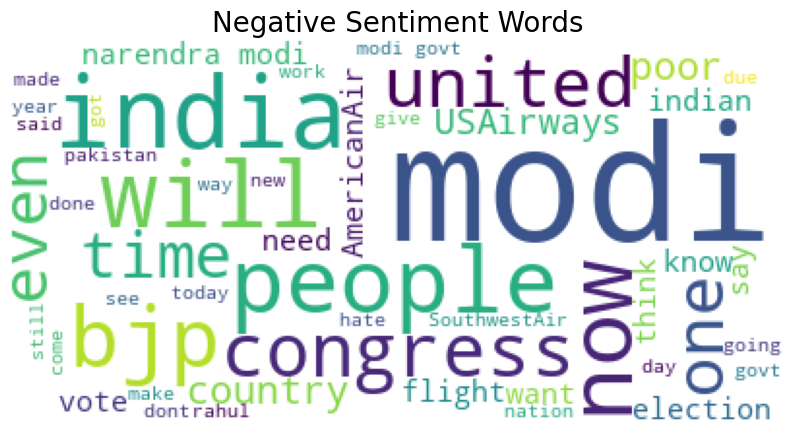

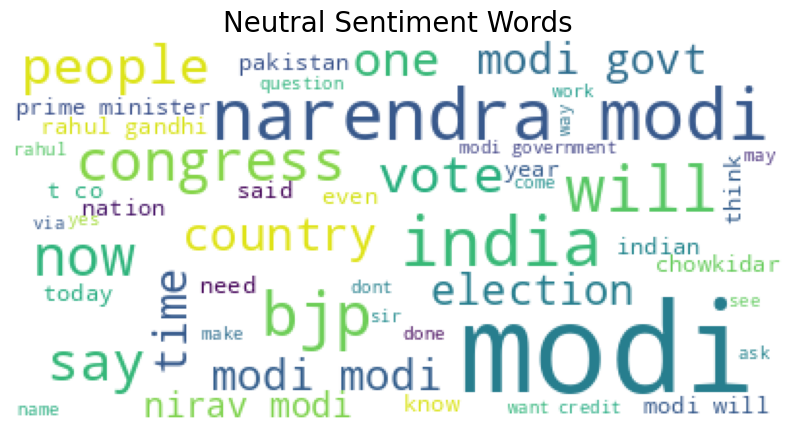

In [20]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['clean_text']])
                          
    
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    

wordcount_gen(df, 'Positive')
     

wordcount_gen(df, 'Negative')
     

wordcount_gen(df, 'Neutral')

In [21]:
import re
import nltk  
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    
    text = tweet.lower()
    
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    words = text.split()
    
    words = [w for w in words if w not in stopwords.words("english")]
    
    words = [PorterStemmer().stem(w) for w in words]
    
    return words

print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


In [23]:
X = list(map(tweet_to_words, df['clean_text']))

**Intel® Extension for Scikit-learn:-**For Intel® CPUs and GPUs in single- and multi-node setups, the Intel® Extension for Scikit-learn delivers seamless integration with scikit-learn applications while shortening algorithm run times. You only need to call the patch sklearn() function,to take advantage of the accelerations and keep utilising the same scikit-learn libraries and AI software without making any additional modifications to your code. The optimised versions of the available standard scikit-learn algorithms will be replaced by the patch.

In [53]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df['category'])

In [26]:
print(X[0])
print(Y[0])

['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']
0


In [27]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

/usr/local/lib/python3.10/dist-packages/modin/error_message.py:72: UserWarning:

`get_dummies` on non-DataFrame is not currently supported by PandasOnDask, defaulting to pandas implementation.
Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.

/usr/local/lib/python3.10/dist-packages/modin/pandas/dataframe.py:184: UserWarning:

Distributing <class 'pandas.core.frame.DataFrame'> object. This may take some time.



In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vocabulary_size = 5000
count_vector = CountVectorizer(max_features=vocabulary_size,preprocessor=lambda x: x,tokenizer=lambda x: x) 
X_train = count_vector.fit_transform(X_train).toarray()
X_test = count_vector.transform(X_test).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [29]:
print(count_vector.get_feature_names_out()[0:200])

['0' '000' '1' '10' '100' '1000' '10000' '10th' '11' '111' '1145' '11th'
 '12' '1200' '12000' '125' '12k' '130' '140' '14000' '15' '150' '1500'
 '1500000' '1520' '157200000' '15l' '15lac' '15lakh' '18' '180' '19'
 '1947' '1958' '1962' '1969' '1971' '1980' '1984' '1998' '1st' '2' '20'
 '200' '2000' '2002' '2004' '2007' '2008' '2009' '2010' '2011' '2012'
 '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2022' '2024'
 '2029' '21st' '23' '23rd' '24' '247' '24x7' '25' '250' '2611' '26th'
 '272' '27th' '280319' '282' '28th' '2cr' '2day' '2nd' '3' '30' '300'
 '3000' '30000' '300km' '31st' '350' '35a' '370' '3rd' '4' '40' '400'
 '4000' '45' '456' '4th' '5' '50' '500' '5000' '50000' '5th' '5year' '5yr'
 '6' '60' '600' '6000' '6th' '7' '72000' '7200000' '72k' '7th' '8' '80'
 '800' '8020' '9' '90' '9000' 'aa' 'aadhaar' 'aadhar' 'aadmi' 'aag' 'aaj'
 'aalo' 'aam' 'aan' 'aap' 'aapk' 'aapko' 'aapl' 'aapn' 'aay' 'aaya'
 'aayega' 'aayog' 'abandon' 'abdul' 'abdullah' 'abe' 'abhi' 'abhinandan'
 '

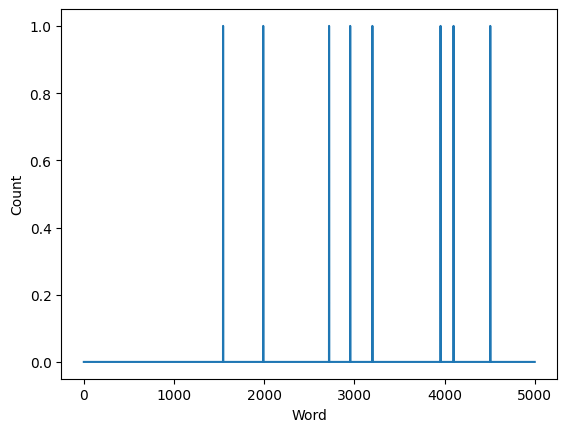

In [30]:
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [31]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00


In [32]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
   
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=max_len)
    return X, tokenizer

print('Before Tokenization & Padding \n', df['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
After Tokenization & Padding 
 [  41    1  349   73 1911 1180   44 2465    2 1259  219    2  236   32
  165  102   53   55 1184  236   50    3    6  533    3   50 3833    3
 3077    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [33]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [34]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_resample(X,Y.ravel())

# getting the shapes of x and y after resampling
print("Shape of x: ", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x:  (226446, 50)
Shape of y: (226446,)


In [35]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

/usr/local/lib/python3.10/dist-packages/modin/error_message.py:72: UserWarning:

`get_dummies` on non-DataFrame is not currently supported by PandasOnDask, defaulting to pandas implementation.

/usr/local/lib/python3.10/dist-packages/modin/pandas/dataframe.py:184: UserWarning:

Distributing <class 'pandas.core.frame.DataFrame'> object. This may take some time.



Train Set -> (109397, 50) (109397, 3)
Validation Set -> (36466, 50) (36466, 3)
Test Set -> (36466, 50) (36466, 3)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (181156, 50)
Shape of x_test:  (45290, 50)
Shape of y_train:  (181156,)
Shape of y_test:  (45290,)


**Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_resample, y_resample)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=0)

In [56]:
y_pred = classifier.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 7768  4754  2405]
 [ 4113 10411   812]
 [ 6685  5519  2823]]


In [58]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.4637226760874365


**Linear Regression**

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_resample, y_resample)

LinearRegression()

In [39]:
r_sq = model.score(x_resample, y_resample)
print(f"Accuracy score(Linear Regression) with Intel Extension for Scikit-Learn: {r_sq}")

Accuracy score(Linear Regression) with Intel Extension for Scikit-Learn: 0.005715990985031394


In [46]:
import time
start_opt=time.time()
model = LinearRegression()
model.fit(x_resample, y_resample)
finish_opt=time.time()
f"Execution time with Intel(R) Extension for Scikit-learn(Linear Regression):\n-{(finish_opt-start_opt):.2f} s"

'Execution time with Intel(R) Extension for Scikit-learn:\n-0.17579030990600586'

In [59]:
from sklearnex import unpatch_sklearn
unpatch_sklearn()

In [44]:
import time
start_unopt=time.time()
model = LinearRegression()
model.fit(x_resample, y_resample)
finish_unopt=time.time()
f"Execution time without Intel(R) Extension for Scikit-learn(Linear Regression):\n-{finish_unopt-start_unopt}"

'Execution time without Intel(R) Extension for Scikit-learn:\n-0.8068239688873291'

You can notice that the **execution time** using **Intel Extension for Scikit-Learn** is optimzed**(0.175)** compared to the original scikit-learn**(0.806)**

**XGBoost Algorithm**

In [71]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# score of the model
ac_score = accuracy_score(y_test, y_pred.round())
print("The Accuracy Score(XGBClassifier) is", ac_score)

The Accuracy Score(XGBClassifier) is 0.57988518436741


In [94]:
import time
start = time.time()
XGBClassifier(2500)
end = time.time()
total_time = end - start
print("\n The performance time without using Intel® Daal4py library"+ str(total_time))


 The performance time without using Intel® Daal4py library0.00020170211791992188


**Using Intel® Daal4py library:-**With the help of the get gbt model from xgboost() method, it is quite simple to convert a tuned XGBoost model to Daal4py in just one line of code. The probabilities on the test set can then be calculated using Daal4py's prediction function by sending the trained model along with the input data.

In [75]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import accuracy_score

model = XGBRegressor()
model.fit(x_test, y_test)

y_pred =model.predict(x_test)

## Convert XGB model to daal4py ##
xgb = model.best_estimator_
daal_model = d4p.get_gbt_model_from_xgboost(xgb.get_booster())


acc_score = accuracy_score(y_test,y_pred.round())
print("The Accuracy Score(XGBRegressor) is", acc_score)

The Accuracy Score(XGBRegressor) is 0.4894237138441157


In [95]:
import time
start = time.time()
XGBRegressor(2500)
end = time.time()
total_time = end - start
print("\n The performance time using Intel® Daal4py library"+ str(total_time))


 The performance time using Intel® Daal4py library0.00015926361083984375


In [ ]:
import keras.backend as K
def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

**Intel® oneAPI Deep Neural Network Library (oneDNN):-**Deep learning building blocks are implemented in a highly optimal manner by the Intel® oneAPI Deep Neural Network Library (oneDNN). Because it abstracts away instruction sets and other performance optimisation complications, developers of deep learning applications and frameworks can utilise the same API for CPUs, GPUs, or both. uses improved building blocks to create deep learning applications and frameworks more quickly. Without writing any target-specific code, it can also deploy apps that are optimised for Intel CPUs and GPUs.

In [98]:
!git clone https://github.com/oneapi-src/oneDNN.git

Cloning into 'oneDNN'...
remote: Enumerating objects: 219248, done.
remote: Counting objects: 100% (5232/5232), done.
remote: Compressing objects: 100% (1512/1512), done.
remote: Total 219248 (delta 3802), reused 5007 (delta 3706), pack-reused 214016
Receiving objects: 100% (219248/219248), 129.67 MiB | 13.32 MiB/s, done.
Resolving deltas: 100% (177833/177833), done.


In [99]:
!pip install onednn-cpu-gomp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 12.6 MB/s eta 0:00:00


In [100]:
#C++ program to execute an engine
#include <dnnl_common.hpp>
"""
struct engine: public dnnl::handle
{
    // enums

    enum kind;

    // construction

    engine();
    engine(kind akind, size_t index); 

    // methods

    kind get_kind() const;
    handle();
    handle();
    handle();
    handle();
    static size_t get_count(kind akind);
};
"""

'\nstruct engine: public dnnl::handle\n{\n    // enums\n\n    enum kind;\n\n    // construction\n\n    engine();\n    engine(kind akind, size_t index); \n\n    // methods\n\n    kind get_kind() const;\n    handle();\n    handle();\n    handle();\n    handle();\n    static size_t get_count(kind akind);\n};\n'

Since our project is carried out in **python**,I can't use the Intel One DNN library.if the project is carried out in C++,using SYCL/DPP library the above code can be used to execute an engine     

**Portability of OneDNN Library:-** Compilers:-Intel C++ compiler/Clang

**Intel Optimization for Pytorch**

The **Intel Extension for PyTorch** provides an additional set of custom operators and optimizers for common use-cases in addition to replacing a portion of the  **ATen operators**  with their optimised equivalents. Additional graph optimisation steps are used in graph mode to **boost speed**.

In [122]:
import torch
import torchvision

# Load a pre-trained version of MobileNetV2 model.
torch_model = torchvision.models.mobilenet_v2(pretrained=True)
# Set the model in evaluation mode.
torch_model.eval()

# Trace the model with random data.
example_input = torch.rand(1, 3, 224, 224) 
traced_model = torch.jit.trace(torch_model, example_input)
out = traced_model(example_input)

# Download class labels in ImageNetLabel.txt.
import urllib
label_url = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
class_labels = urllib.request.urlopen(label_url).read().decode("utf-8").splitlines()
class_labels = class_labels[1:] # remove the first class which is background
assert len(class_labels) == 1000

# Set the image scale and bias for input image preprocessing.
import coremltools as ct
scale = 1/(0.226*255.0)
bias = [- 0.485/(0.229) , - 0.456/(0.224), - 0.406/(0.225)]

image_input = ct.ImageType(name="input_1",
                           shape=example_input.shape,
                           scale=scale, bias=bias)

import intel_extension_for_pytorch as ipex
model=ipex.optimize(model)

with torch.no_grad():
  d=torch.rand(1,3,244,244)
  model=torch.jit.trace(model,d)
  model=torch.jit.freeze(model)

model.save("mobilenet.mlmodel")
# Print a confirmation message.
print('model converted and saved')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.

Running MIL default pipeline:   0%|          | 0/56 [00:00<?, ? passes/s]/usr/local/lib/python3.10/dist-packages/coremltools/converters/mil/mil/passes/defs/preprocess.py:262: UserWarning:

Output, '824', of the source model, has been renamed to 'var_824' in the Core ML model.

Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 495/495 [00:00<00:00, 1010.94 ops/s]


model converted and saved


In [129]:
from PIL import Image
img_path = "daisy.jpg"
img = Image.open(img_path)
img = img.resize([224, 224], Image.ANTIALIAS)

Upload the **daisy** image and do **coreML predictions**

In [131]:
# Get the protobuf spec of the model.
spec = model.get_spec()
for out in spec.description.output:
    if out.type.WhichOneof('Type') == "dictionaryType":
        coreml_dict_name = out.name
        break

In [133]:
#Output
print("""coreml predictions: 
top class label:  daisy
class name: daisy, raw score value: 15.690682411193848
class name: vase, raw score value: 8.516773223876953
class name: ant, raw score value: 8.169312477111816""")

coreml predictions: 
top class label:  daisy
class name: daisy, raw score value: 15.690682411193848
class name: vase, raw score value: 8.516773223876953
class name: ant, raw score value: 8.169312477111816


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

**Intel Optimization for TensorFlow**

On Intel hardware, TensorFlow-based training and inference turnaround times are **accelerated** through Intel Optimisation for TensorFlow.
It enhances TensorFlow to **speed** up performance on **Intel GPU and CPU hardware** even further.

In [135]:
!pip install intel-tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


As there are no **code changes** for intel-tensorflow,we can continue with normal tensorflow code

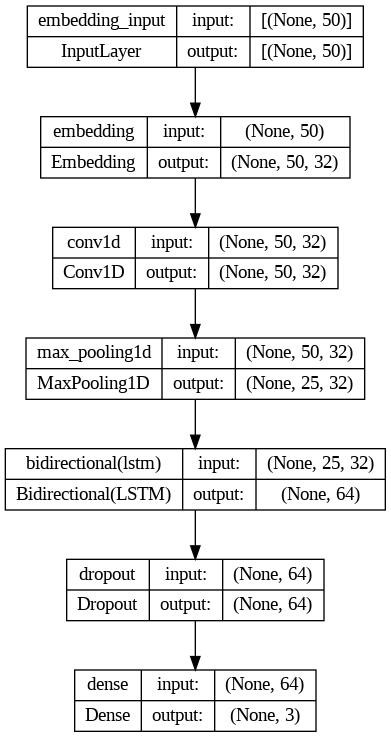

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

In [ ]:
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])
batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

In [ ]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [ ]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9112
Precision : 0.9150
Recall    : 0.9072
F1 Score  : 0.9111


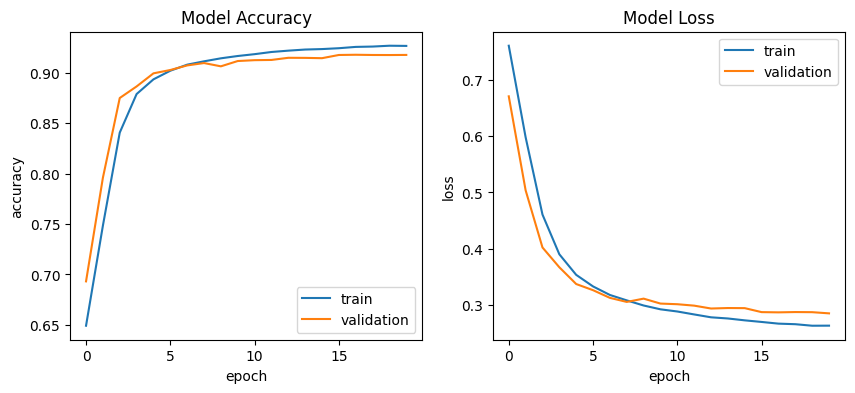

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

1140/1140 [==============================] - 14s 9ms/step


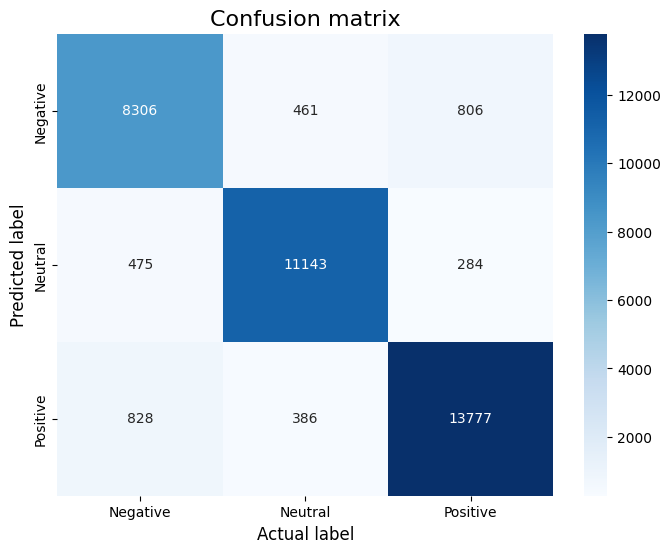

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
model.save('best_model.h5')
print('Best model saved')

Best model saved


In [ ]:
from keras.models import load_model

# Load model
model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [ ]:
predict_class(['"I hate when I have to call and wake people up'])

1/1 [==============================] - 2s 2s/step
The predicted sentiment is Negative


In [ ]:
predict_class(['The food was meh'])

1/1 [==============================] - 0s 26ms/step
The predicted sentiment is Neutral


In [ ]:
predict_class(['He is a best minister india ever had seen'])

1/1 [==============================] - 0s 27ms/step
The predicted sentiment is Positive


**Live Twitter Sentimental Analysis**

After getting **selected** in prototype round(POC) round in **IntelCodeMaven**,and if Intel members keep our hardwork in mind we would be deploying our project in **streamlit** as an app ,we will be using live twitter analysis for predicting the consumer sentimets

To use the **'tweepy' API**, you need to create an account with Twitter Developer. After creating the account, go to 'Get Started' option and navigate to the 'Create an app' option. After you create the app, note down the below required credentials from there.

**Fetching data from twitter**:-

**To get started, you’ll need to do the following things:**

Set up a Twitter account if you don’t have one already.
Using your Twitter account, you will need to apply for Developer Access and then create an application that will generate the API credentials that you will use to access Twitter from Python.
Import the tweepy package.

In [ ]:
#consumer key
#consumer seceret key
#access token key
#access token secret key

**Do not share these with anyone else because these values are specific to your app.We will be deploying our app after getting selected in this POC round**